In [1]:
# libary
import sys
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm;
import statsmodels.formula.api as ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
from sklearn.preprocessing import RobustScaler, MinMaxScaler

%matplotlib inline
# 관련 라이브러리 임포트 
import matplotlib.font_manager as fm

#  한글글꼴로 변경
# plt.rcParams['font.family'] = '한글글꼴명'
plt.rcParams['font.size'] = 22.0
# plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

# 그래프 기본 크기 설정 
plt.rcParams['figure.figsize'] = [20, 6]

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel("data/회귀분석용 데이터5.xlsx")
del data['Unnamed: 0']

In [3]:
data

,ID,주택금융가능여부22/2,등락율22/2,전세가율22/2,전용면적22/2,건축년도.17,건물나이22/2,세대수,세대당주차수,지하주차비율,관리시설수,거래금액(만원)_22/2
0,서울특별시 강남구 개포동 개포6차우성아파트1동~8동 80,0,1.7,27.1,80,1987.0,35.0,NaN,NaN,NaN,NaN,218666.7
1,서울특별시 강남구 개포동 개포주공1단지 40,0,0.0,5.6,40,1982.0,40.0,NaN,NaN,NaN,NaN,180000.0
2,서울특별시 강남구 개포동 개포주공5단지 60,0,0.0,21.8,60,1983.0,39.0,940.0,0.693617,0.000000,5.0,202800.0
3,서울특별시 강남구 개포동 개포주공5단지 80,0,0.0,22.1,80,1983.0,39.0,940.0,0.693617,0.000000,5.0,282250.0
4,서울특별시 강남구 개포동 개포주공6단지 50,0,0.0,22.8,50,1983.0,39.0,1060.0,1.037736,0.000000,3.0,189000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4086,서울특별시 중랑구 중화동 중화동건영아파트 60,1,0.0,50.8,60,1998.0,24.0,NaN,NaN,NaN,NaN,47500.0
4087,서울특별시 중랑구 중화동 태능에셈빌 80,0,0.0,21.1,80,2005.0,17.0,NaN,NaN,NaN,NaN,71000.0
4088,서울특별시 중랑구 중화동 한신아파트 50,0,0.0,52.9,50,1997.0,25.0,1544.0,0.970855,0.683122,5.0,70000.0
4089,서울특별시 중랑구 중화동 한신아파트 60,0,0.0,49.5,60,1997.1,24.9,1544.0,0.970855,0.683122,5.0,73000.0


In [4]:
def heatmap(dataset):
    cmap = plt.cm.PuBu
    corr = dataset.corr()
    plt.figure(figsize=(25, 16))  
    sns.heatmap(corr, linewidths = 0.1, 
                vmax = 1.0, 
                square = True, 
                cmap = 'seismic', 
                linecolor = "white", 
                annot = True, 
                annot_kws = {"size" : 10})

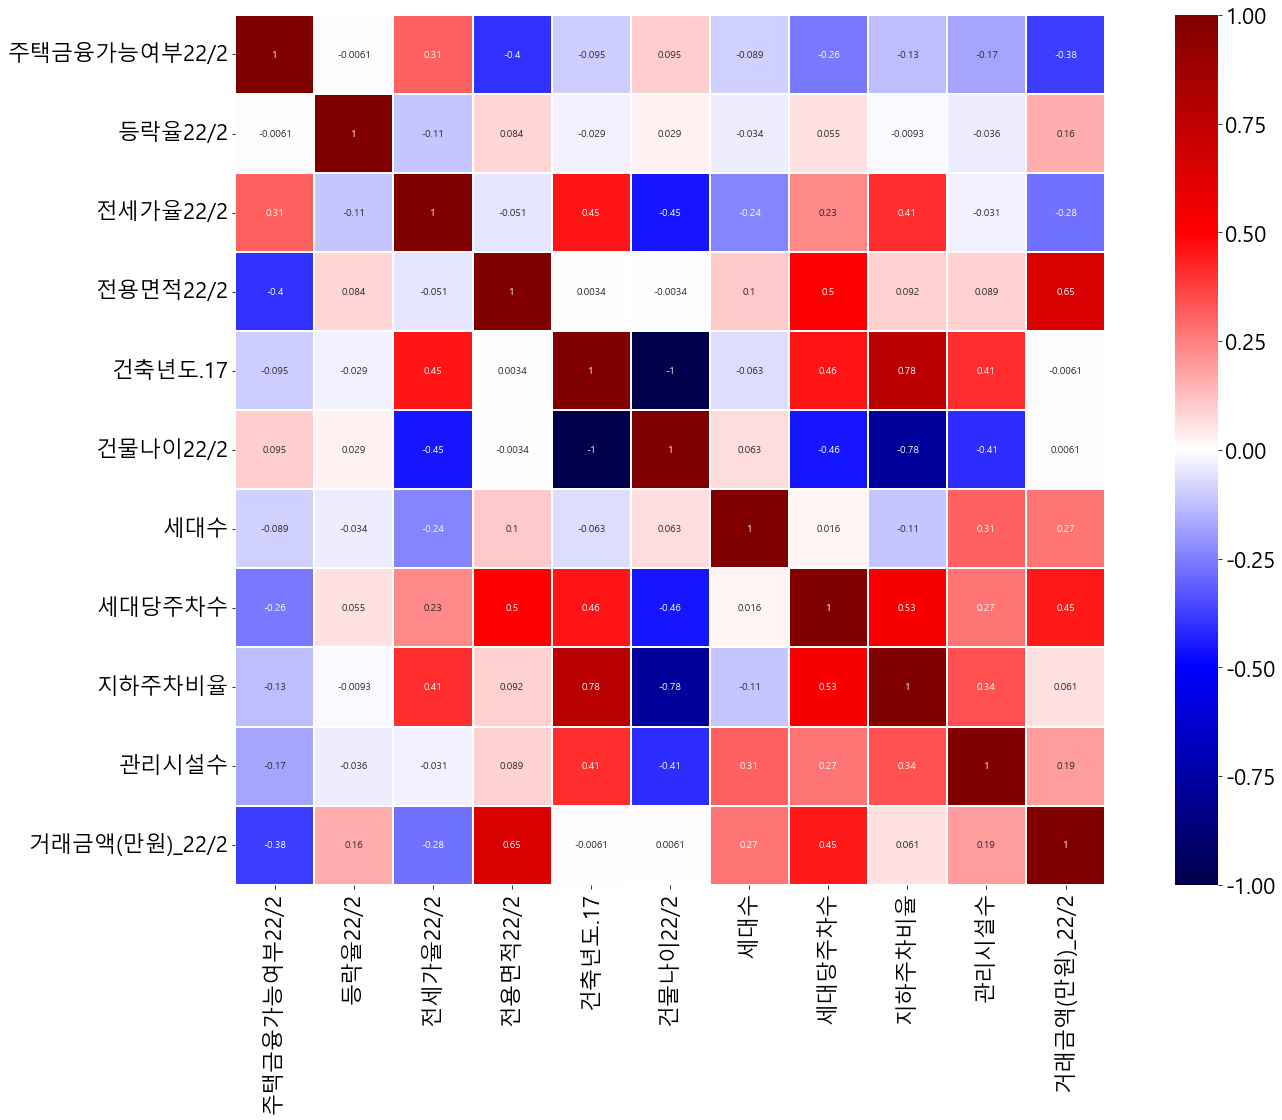

In [5]:
heatmap(data)

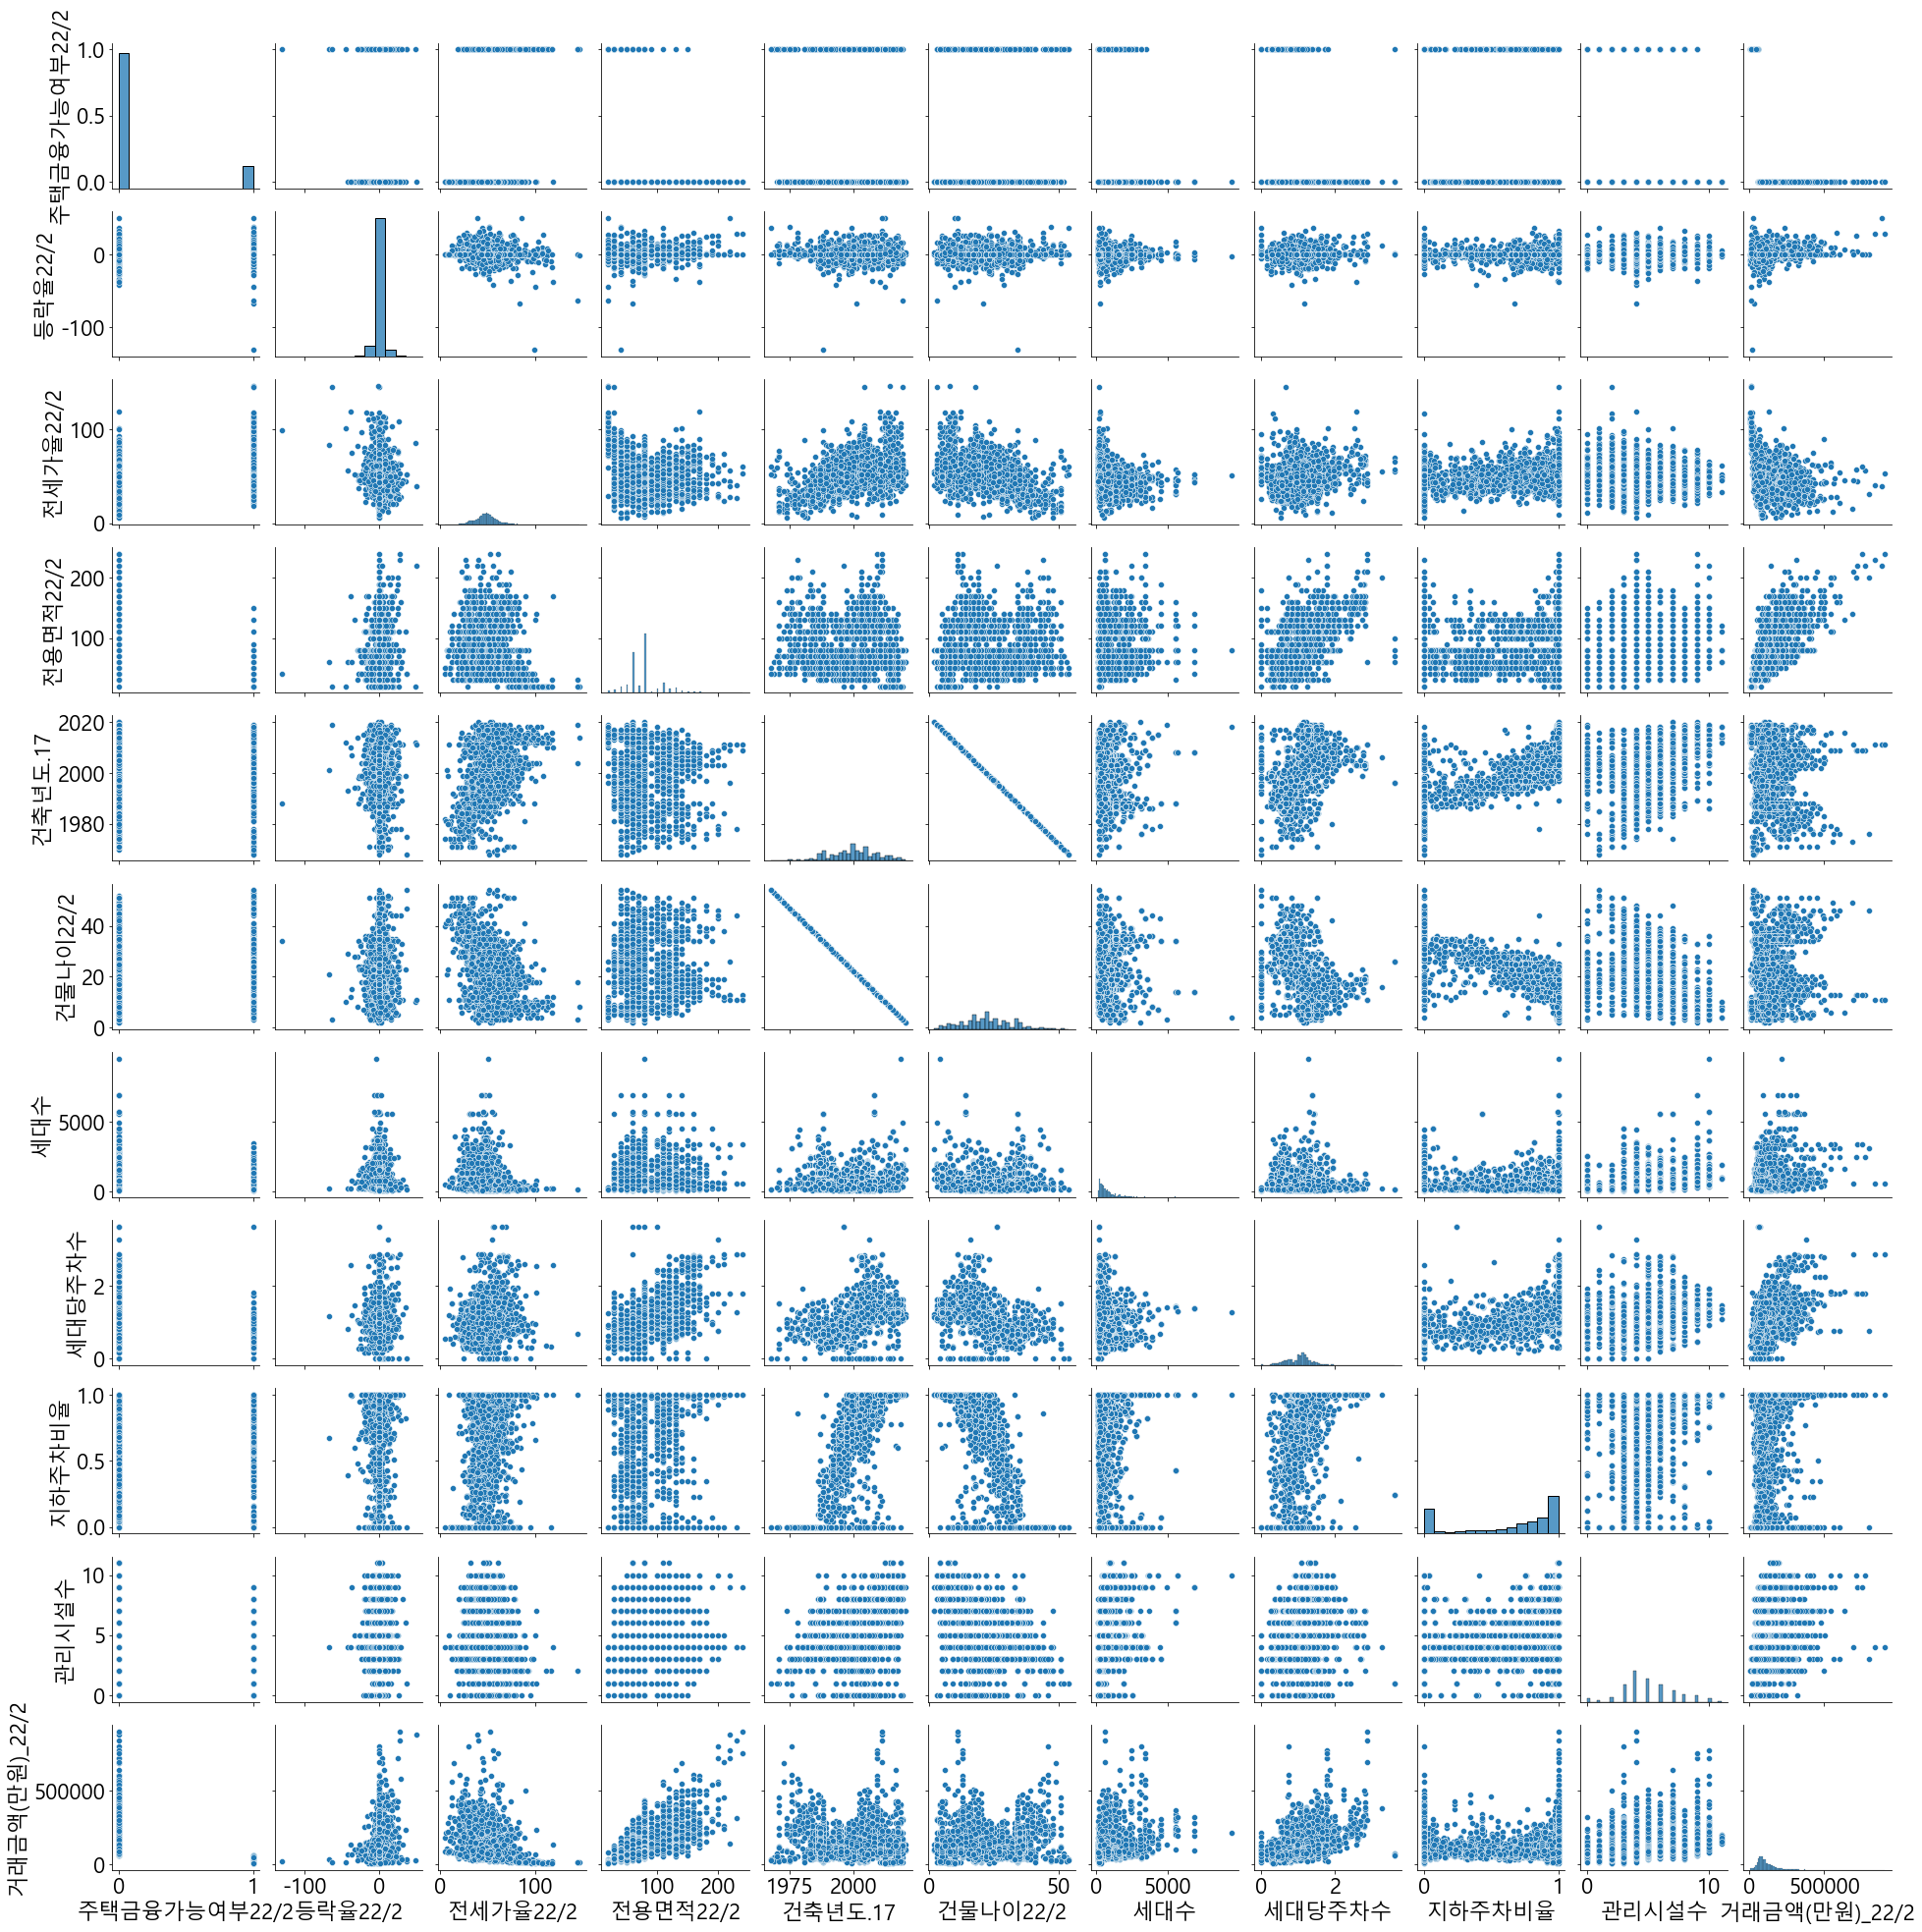

In [6]:
sns.pairplot(data)

<AxesSubplot:xlabel='거래금액(만원)_22/2', ylabel='Density'>

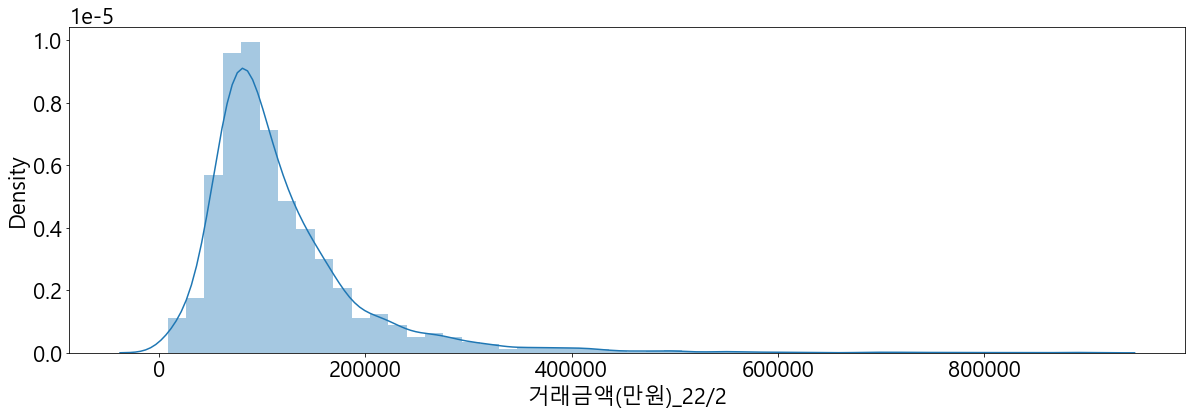

In [7]:
price = data["거래금액(만원)_22/2"]
sns.distplot(price)

In [8]:
del data['ID']
del data['건축년도.17']

In [9]:
data.dropna(inplace=True)

In [10]:
X = data.drop("거래금액(만원)_22/2", axis = 1)
y = data["거래금액(만원)_22/2"]

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(train_X, train_y)

# Inference
train_pred = model.predict(train_X)
val_pred = model.predict(val_X)

# RMSE
train_rmse = mean_squared_error(train_y, train_pred, squared = False)
val_rmse = mean_squared_error(val_y, val_pred, squared = False)

# r2 score
train_r2 = r2_score(train_y, train_pred)
val_r2 = r2_score(val_y, val_pred) 


print('MAE & r2 score for train/val data set'), 
print('---------------------------------------------'), 
print("RMSE score:{:.3f} , r2 score:{:.3f} for train dataset".format(train_rmse, train_r2)), 
print("RMSE score:{:.3f} , r2 score:{:.3f} for validation dataset".format(val_rmse, val_r2))

MAE & r2 score for train/val data set
---------------------------------------------
RMSE score:52566.038 , r2 score:0.569 for train dataset
RMSE score:53717.281 , r2 score:0.537 for validation dataset


In [11]:
train_temp = train_X
train_temp = sm.add_constant(train_temp)
ols = sm.OLS(train_y, train_temp).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          거래금액(만원)_22/2   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     385.6
Date:                Sat, 24 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:43:55   Log-Likelihood:                -32393.
No. Observations:                2636   AIC:                         6.481e+04
Df Residuals:                    2626   BIC:                         6.487e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4.705e+04   1.02e+04      4.622      0.000    2.71e+04     6.7e+04
주택금융가능여부22/2 -3331.3328   3716.000     -0.896      0.370   -1.06e+04    3955.252
등락율22/2       1369.6585    197.305      6.942      0.000     982.769    1756.548
전세가율22/2     -1910.5849    108.937    -17.538      0.000   -2124.196   -1696.974
전용면적22/2      1457.9253     45.178     32.271      0.000    1369.337    1546.514
건물나이22/2      -267.8263    201.801     -1.327      0.185    -663.531     127.878
세대수             12.8907      1.365      9.444      0.000      10.214      15.567
세대당주차수         4.28e+04   3408.678     12.555      0.000    3.61e+04    4.95e+04
지하주차비율       -3534.5315   4795.565     -0.737      0.461   -1.29e+04    5868.937
관리시설수          867.4866    578.603      1.499      0.134    -267.076    2002.050
==============================================================================
Omnibus:                     1288.978   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14494.223
Skew:                           2.036   Prob(JB):                         0.00
Kurtosis:                      13.742   Cond. No.                     1.19e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""